In [28]:
# Sphere model

import matplotlib.pyplot as plt 
from math import exp
from random import seed
from random import random
import math
 
# Initialize a network

def initialize_network_1(n_inputs, outputs):
    network = list()
    n_outputs = len(outputs)
    output_layer = [{'weights':[random() for _ in range(n_inputs)],
                     'inputs':[0 for _ in range(n_inputs)], 'output':0, 'delta':0,'A':0,'R':0,"C":0} for i in range(n_outputs)]
    network.append(output_layer)
    
    for layer in network:
        db = 0
        for neuron in layer:
            s1 = sum([x*x for x in neuron["weights"]])
            s2 = math.sqrt(s1)
            neuron["weights"] = [x /s2 for x in neuron["weights"] ]
            neuron["A"] = .2 + 0.6*random()
            neuron["R"] = .2 + 4*random()
            neuron["C"] = outputs[db]
            db = db + 1
            print_neuron_param(neuron)
            
    return network


def set_network_1(network):
    
    network[0][0]["weights"] = [1,1]
    network[0][0]["A"] = 1.
    network[0][0]["R"] = 1.
    network[0][1]["weights"] = [0,4]
    network[0][1]["A"] = 1.5
    network[0][1]["R"] = 2.
    network[0][2]["weights"] = [4,0]
    network[0][2]["A"] = 1.5
    network[0][2]["R"] = 2.
    
    
    for layer in network:
        db = 0
        for neuron in layer:
            s1 = sum([x*x for x in neuron["weights"]])
            s2 = math.sqrt(s1)
            neuron["weights"] = [x /s2 for x in neuron["weights"] ]
            print_neuron_param(neuron)
               
    return network


def initialize_network_2(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for _ in range(n_inputs)],
                     'inputs':[0 for _ in range(n_inputs)], 'output':0, 'delta':0,'A':0,'R':0} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for _ in range(n_hidden)],
                     'inputs':[0 for _ in range(n_hidden)], 'output':0, 'delta':0,'A':0,'R':0} for i in range(n_outputs)]
    network.append(output_layer)
    
    for layer in network:
        for neuron in layer:
            s1 = sum([x*x for x in neuron["weights"]])
            s2 = math.sqrt(s1)
            neuron["weights"] = [x /s2 for x in neuron["weights"] ]
            neuron["A"] = .2 + 0.6*random()
            neuron["R"] = .2 + 1.8*random()
            
    
    return network
 
def print_neuron_param(neuron):
     print(neuron["weights"], neuron["A"], neuron["R"],neuron["C"])
    
# Calculate neuron activation for an input
def activate(neuron):
    N = len(neuron["weights"])
    y1 = sum([neuron["inputs"][i]*neuron["inputs"][i] for i in range(N) ])
    y2 = sum([neuron["inputs"][i]*neuron["weights"][i] for i in range(N) ])
    activation = - (y1 - 2*(neuron["A"] + neuron["R"])*y2 + neuron["A"]*neuron["A"] + 2*neuron["A"]*neuron["R"])
    return activation
 
# Transfer neuron activation
def transfer(activation):
    return 1.0 / (1.0 + exp(-.1*activation))

# Calculate the derivative of an neuron output
def transfer_derivative(neuron):
    return .1*neuron['output'] * (1.0 - neuron['output'])

# Calculate the derivative of the activation function
def activation_derivate_by_input(neuron, idx):
    return 2*neuron['inputs'][idx] - 2*(neuron["A"] + neuron["R"])*neuron["weights"][idx]

def activation_derivate_by_weight(neuron, idx):
    return  - 2*(neuron["A"] + neuron["R"])*neuron["inputs"][idx]

def activation_derivate_by_A(neuron):
    N = len(neuron["inputs"])
    s1 = sum([neuron["inputs"][i]*neuron["weights"][i] for i in range(N)])
    return -2*s1 + 2*(neuron["A"] + neuron["R"])

def activation_derivate_by_R(neuron):
    N = len(neuron["inputs"])
    s1 = sum([neuron["inputs"][i]*neuron["weights"][i] for i in range(N)])
    return -2*s1 + 2*(neuron["A"])
              
              
# Forward propagate input to a network output
def forward_propagate(network, row):
    for neuron in network[0]:
        for i in range(len(row)-1):
            neuron['inputs'][i] = row[i]
            
    for l in range(len(network)):
        layer = network[l]
        for neuron in layer:
            activation = activate(neuron)
            neuron['output'] = transfer(activation)
        if l < len(network)-1:
            for neuron in network[l+1]:
                for i in range(len(network[l])):
                    neuron['inputs'][i] = network[l][i]["output"]
            
        outputs = []
        for neuron in network[-1]:
            outputs.append(neuron["output"])
    return outputs
 

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (activation_derivate_by_input(neuron, j) * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                #exp = expected[j] if neuron["C"] == '0' else (1-expected[j])
                exp = expected[j] 
                errors.append(exp - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron)
 
# Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        for neuron in network[i]:
            for j in range(len(neuron["weights"])):
                neuron['weights'][j] -= l_rate * neuron['delta'] * activation_derivate_by_weight(neuron, j)
            neuron['A'] -= l_rate * neuron['delta']*activation_derivate_by_A(neuron)
            neuron['R'] -= 1.5*l_rate * neuron['delta']*activation_derivate_by_R(neuron)
            s1 = sum([x*x for x in neuron["weights"]])
            s2 = math.sqrt(s1)
            neuron["weights"] = [x /s2 for x in neuron["weights"] ]
            #print (neuron["weights"], neuron["A"],neuron["R"])

 

# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, outputs, drf = 5):
    n_outputs = len(outputs)
    draw_network(network, train)
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            voutputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            for i in range(n_outputs):
                if outputs[i] == row[-1]:
                    expected[i] = 1
            sum_error += sum([(expected[i]-voutputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
        if epoch % drf == 0:
            draw_network(network, train)
 

def draw_network (network, train):
    figure, axes = plt.subplots()
    axes.set_aspect( 1 )
    for i in range(len(network[-1])):
        sn = network[-1][i]
        cl = 'blue' if sn["C"] > 0 else 'red'
        cc = plt.Circle( ((sn["A"]+sn["R"])*sn["weights"][0], (sn["A"]+sn["R"])*sn["weights"][1] ), sn["R"] ,fill = False,color=cl )   
        axes.add_artist( cc)    
    for i in range(len(train)):
        cl = 'blue' if train[i][2] > 0 else 'red'
        cc = plt.Circle( (train[i][0], train[i][1] ), 0.1 ,fill = True, color =cl )   
        axes.add_artist( cc)        

    plt.xlim( -2 ,8 ) 
    plt.ylim( -2 , 8) 
    plt.title( 'Circle' ) 
    plt.show()



[0.6645417178811653, 0.7472511660717227] 0.5180386513005333 2.7693891585918666 0
[0.49744053504859187, 0.8674980772835007] 0.3105550570232166 2.709155014721328 1


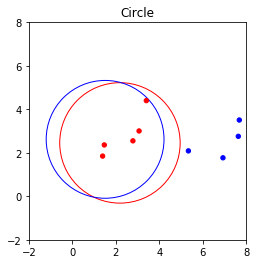

>epoch=0, lrate=0.500, error=7.048


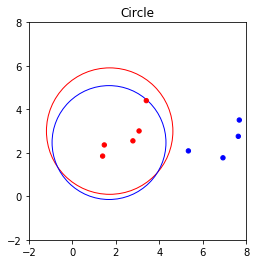

>epoch=1, lrate=0.500, error=6.718
>epoch=2, lrate=0.500, error=5.942
>epoch=3, lrate=0.500, error=4.385
>epoch=4, lrate=0.500, error=2.792
>epoch=5, lrate=0.500, error=2.055
>epoch=6, lrate=0.500, error=1.659
>epoch=7, lrate=0.500, error=1.386
>epoch=8, lrate=0.500, error=1.189
>epoch=9, lrate=0.500, error=1.042
>epoch=10, lrate=0.500, error=0.930


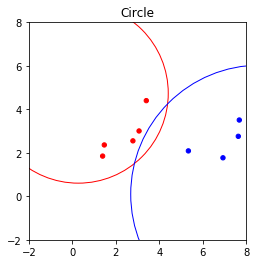

>epoch=11, lrate=0.500, error=0.849
>epoch=12, lrate=0.500, error=0.791
>epoch=13, lrate=0.500, error=0.747
>epoch=14, lrate=0.500, error=0.714
>epoch=15, lrate=0.500, error=0.687
>epoch=16, lrate=0.500, error=0.664
>epoch=17, lrate=0.500, error=0.643
>epoch=18, lrate=0.500, error=0.625
>epoch=19, lrate=0.500, error=0.609
>epoch=20, lrate=0.500, error=0.594


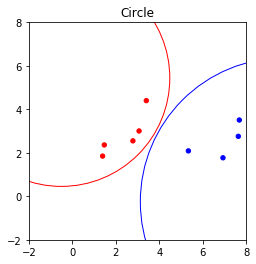

>epoch=21, lrate=0.500, error=0.580
>epoch=22, lrate=0.500, error=0.567
>epoch=23, lrate=0.500, error=0.555
>epoch=24, lrate=0.500, error=0.543
>epoch=25, lrate=0.500, error=0.531
>epoch=26, lrate=0.500, error=0.521
>epoch=27, lrate=0.500, error=0.510
>epoch=28, lrate=0.500, error=0.500
>epoch=29, lrate=0.500, error=0.490
>epoch=30, lrate=0.500, error=0.481


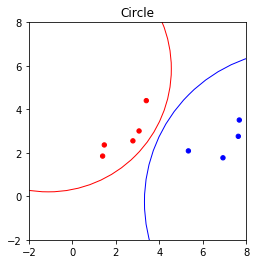

>epoch=31, lrate=0.500, error=0.472
>epoch=32, lrate=0.500, error=0.463
>epoch=33, lrate=0.500, error=0.455
>epoch=34, lrate=0.500, error=0.446
>epoch=35, lrate=0.500, error=0.438
>epoch=36, lrate=0.500, error=0.430
>epoch=37, lrate=0.500, error=0.422
>epoch=38, lrate=0.500, error=0.415
>epoch=39, lrate=0.500, error=0.407
>epoch=40, lrate=0.500, error=0.400


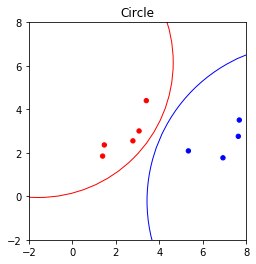

>epoch=41, lrate=0.500, error=0.393
>epoch=42, lrate=0.500, error=0.386
>epoch=43, lrate=0.500, error=0.380
>epoch=44, lrate=0.500, error=0.373
>epoch=45, lrate=0.500, error=0.366
>epoch=46, lrate=0.500, error=0.360
>epoch=47, lrate=0.500, error=0.354
>epoch=48, lrate=0.500, error=0.348
>epoch=49, lrate=0.500, error=0.342


In [26]:
# Test training backprop algorithm
#seed(1)
T = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
n_inputs = len(T[0]) - 1
outputs = list(set([row[-1] for row in T]))
#network = initialize_network_2(n_inputs, 2, n_outputs)
network = initialize_network_1(n_inputs,  outputs)
train_network(network, T, 0.5, 50, outputs,10)
#for layer in network:
#	print(layer)


[0.8541296510686615, 0.5200601303362206] 0.5720482805677443 2.2759030266380944 0
[0.6798884481085536, 0.7333155515387237] 0.3508115291275036 2.755541335311179 1
[0.24184657287392916, 0.9703145032354897] 0.5392491291714507 0.7072673739837108 1


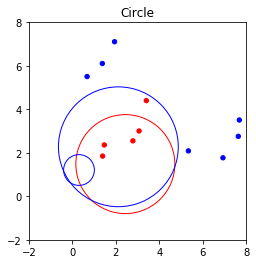

>epoch=0, lrate=0.050, error=16.569


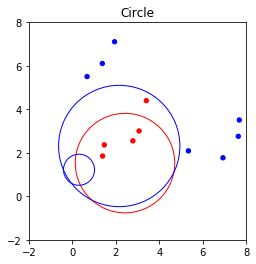

>epoch=1, lrate=0.050, error=16.509
>epoch=2, lrate=0.050, error=16.447
>epoch=3, lrate=0.050, error=16.383
>epoch=4, lrate=0.050, error=16.317
>epoch=5, lrate=0.050, error=16.247
>epoch=6, lrate=0.050, error=16.174
>epoch=7, lrate=0.050, error=16.097
>epoch=8, lrate=0.050, error=16.016
>epoch=9, lrate=0.050, error=15.930
>epoch=10, lrate=0.050, error=15.839


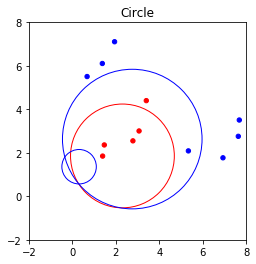

>epoch=11, lrate=0.050, error=15.743
>epoch=12, lrate=0.050, error=15.642
>epoch=13, lrate=0.050, error=15.538
>epoch=14, lrate=0.050, error=15.430
>epoch=15, lrate=0.050, error=15.321
>epoch=16, lrate=0.050, error=15.210
>epoch=17, lrate=0.050, error=15.101
>epoch=18, lrate=0.050, error=14.994
>epoch=19, lrate=0.050, error=14.889
>epoch=20, lrate=0.050, error=14.789


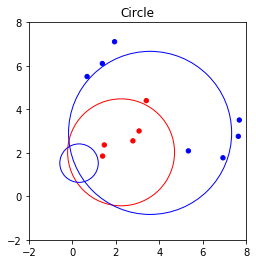

>epoch=21, lrate=0.050, error=14.693
>epoch=22, lrate=0.050, error=14.602
>epoch=23, lrate=0.050, error=14.516
>epoch=24, lrate=0.050, error=14.435
>epoch=25, lrate=0.050, error=14.358
>epoch=26, lrate=0.050, error=14.286
>epoch=27, lrate=0.050, error=14.219
>epoch=28, lrate=0.050, error=14.155
>epoch=29, lrate=0.050, error=14.095
>epoch=30, lrate=0.050, error=14.038


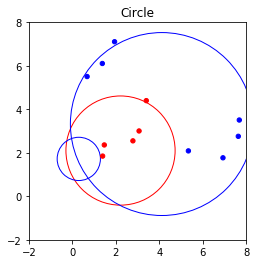

>epoch=31, lrate=0.050, error=13.984
>epoch=32, lrate=0.050, error=13.933
>epoch=33, lrate=0.050, error=13.884
>epoch=34, lrate=0.050, error=13.837
>epoch=35, lrate=0.050, error=13.793
>epoch=36, lrate=0.050, error=13.750
>epoch=37, lrate=0.050, error=13.708
>epoch=38, lrate=0.050, error=13.668
>epoch=39, lrate=0.050, error=13.629
>epoch=40, lrate=0.050, error=13.592


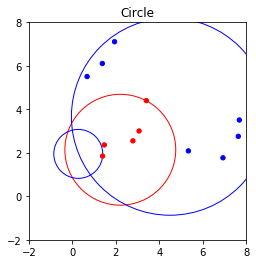

>epoch=41, lrate=0.050, error=13.555
>epoch=42, lrate=0.050, error=13.519
>epoch=43, lrate=0.050, error=13.484
>epoch=44, lrate=0.050, error=13.449
>epoch=45, lrate=0.050, error=13.415
>epoch=46, lrate=0.050, error=13.381
>epoch=47, lrate=0.050, error=13.348
>epoch=48, lrate=0.050, error=13.315
>epoch=49, lrate=0.050, error=13.283
>epoch=50, lrate=0.050, error=13.250


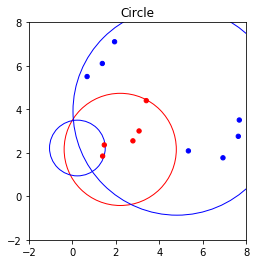

>epoch=51, lrate=0.050, error=13.218
>epoch=52, lrate=0.050, error=13.186
>epoch=53, lrate=0.050, error=13.154
>epoch=54, lrate=0.050, error=13.122
>epoch=55, lrate=0.050, error=13.090
>epoch=56, lrate=0.050, error=13.057
>epoch=57, lrate=0.050, error=13.025
>epoch=58, lrate=0.050, error=12.993
>epoch=59, lrate=0.050, error=12.961
>epoch=60, lrate=0.050, error=12.929


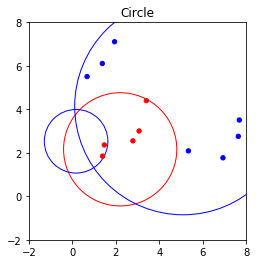

>epoch=61, lrate=0.050, error=12.896
>epoch=62, lrate=0.050, error=12.864
>epoch=63, lrate=0.050, error=12.831
>epoch=64, lrate=0.050, error=12.799
>epoch=65, lrate=0.050, error=12.766
>epoch=66, lrate=0.050, error=12.733
>epoch=67, lrate=0.050, error=12.699
>epoch=68, lrate=0.050, error=12.666
>epoch=69, lrate=0.050, error=12.633
>epoch=70, lrate=0.050, error=12.599


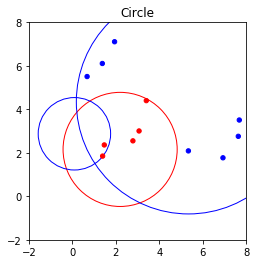

>epoch=71, lrate=0.050, error=12.565
>epoch=72, lrate=0.050, error=12.531
>epoch=73, lrate=0.050, error=12.497
>epoch=74, lrate=0.050, error=12.463
>epoch=75, lrate=0.050, error=12.428
>epoch=76, lrate=0.050, error=12.394
>epoch=77, lrate=0.050, error=12.359
>epoch=78, lrate=0.050, error=12.325
>epoch=79, lrate=0.050, error=12.290
>epoch=80, lrate=0.050, error=12.255


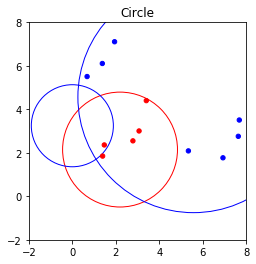

>epoch=81, lrate=0.050, error=12.220
>epoch=82, lrate=0.050, error=12.185
>epoch=83, lrate=0.050, error=12.150
>epoch=84, lrate=0.050, error=12.115
>epoch=85, lrate=0.050, error=12.080
>epoch=86, lrate=0.050, error=12.045
>epoch=87, lrate=0.050, error=12.010
>epoch=88, lrate=0.050, error=11.975
>epoch=89, lrate=0.050, error=11.940
>epoch=90, lrate=0.050, error=11.905


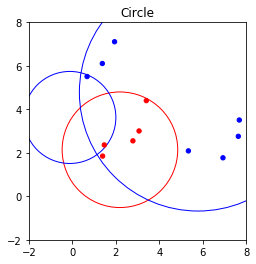

>epoch=91, lrate=0.050, error=11.870
>epoch=92, lrate=0.050, error=11.835
>epoch=93, lrate=0.050, error=11.800
>epoch=94, lrate=0.050, error=11.765
>epoch=95, lrate=0.050, error=11.731
>epoch=96, lrate=0.050, error=11.696
>epoch=97, lrate=0.050, error=11.662
>epoch=98, lrate=0.050, error=11.628
>epoch=99, lrate=0.050, error=11.594
>epoch=100, lrate=0.050, error=11.560


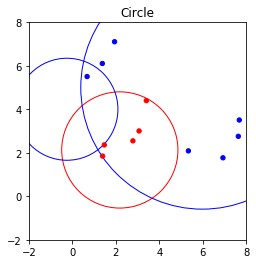

>epoch=101, lrate=0.050, error=11.527
>epoch=102, lrate=0.050, error=11.493
>epoch=103, lrate=0.050, error=11.460
>epoch=104, lrate=0.050, error=11.427
>epoch=105, lrate=0.050, error=11.394
>epoch=106, lrate=0.050, error=11.362
>epoch=107, lrate=0.050, error=11.329
>epoch=108, lrate=0.050, error=11.297
>epoch=109, lrate=0.050, error=11.265
>epoch=110, lrate=0.050, error=11.234


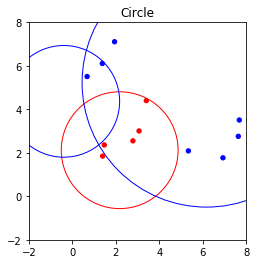

>epoch=111, lrate=0.050, error=11.203
>epoch=112, lrate=0.050, error=11.172
>epoch=113, lrate=0.050, error=11.141
>epoch=114, lrate=0.050, error=11.110
>epoch=115, lrate=0.050, error=11.080
>epoch=116, lrate=0.050, error=11.051
>epoch=117, lrate=0.050, error=11.021
>epoch=118, lrate=0.050, error=10.992
>epoch=119, lrate=0.050, error=10.963
>epoch=120, lrate=0.050, error=10.934


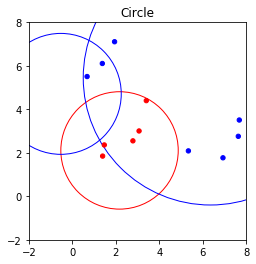

>epoch=121, lrate=0.050, error=10.906
>epoch=122, lrate=0.050, error=10.878
>epoch=123, lrate=0.050, error=10.851
>epoch=124, lrate=0.050, error=10.823
>epoch=125, lrate=0.050, error=10.796
>epoch=126, lrate=0.050, error=10.770
>epoch=127, lrate=0.050, error=10.744
>epoch=128, lrate=0.050, error=10.718
>epoch=129, lrate=0.050, error=10.692
>epoch=130, lrate=0.050, error=10.667


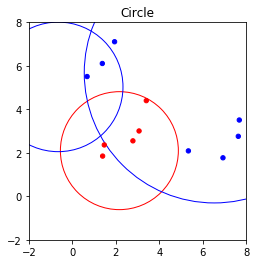

>epoch=131, lrate=0.050, error=10.642
>epoch=132, lrate=0.050, error=10.618
>epoch=133, lrate=0.050, error=10.594
>epoch=134, lrate=0.050, error=10.570
>epoch=135, lrate=0.050, error=10.547
>epoch=136, lrate=0.050, error=10.524
>epoch=137, lrate=0.050, error=10.501
>epoch=138, lrate=0.050, error=10.478
>epoch=139, lrate=0.050, error=10.456
>epoch=140, lrate=0.050, error=10.435


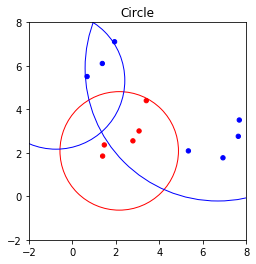

>epoch=141, lrate=0.050, error=10.413
>epoch=142, lrate=0.050, error=10.392
>epoch=143, lrate=0.050, error=10.372
>epoch=144, lrate=0.050, error=10.351
>epoch=145, lrate=0.050, error=10.331
>epoch=146, lrate=0.050, error=10.312
>epoch=147, lrate=0.050, error=10.292
>epoch=148, lrate=0.050, error=10.273
>epoch=149, lrate=0.050, error=10.255


In [29]:
# Test training backprop algorithm
#seed(1)
T = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1],
    [0.673756466,5.508563011,1],
    [1.373756466,6.108563011,1],
    [1.93756466,7.108563011,1] 
    ]
n_inputs = len(T[0]) - 1
outputs = [0,1,1]
#n_outputs = 3 #len(set([row[-1] for row in T]))
#network = initialize_network_2(n_inputs, 2, n_outputs)
network = initialize_network_1(n_inputs,  outputs)
#set_network_1 (network)
train_network(network, T, 0.05, 150, outputs,10)
#for layer in network:
#	print(layer)


In [70]:
for row in T:
    outputs = forward_propagate(network, row)
    expected = [0 for i in range(n_outputs)]
    expected[row[-1]] = 1
    err= sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
    print (row, outputs, err)

[2.7810836, 2.550537003, 0] [0.6343897570831458, 0.31912743145342753] 0.23551316723178323
[1.465489372, 2.362125076, 0] [0.6131466954839474, 0.3417426841923587] 0.26644354141398796
[3.396561688, 4.400293529, 0] [0.617322997560052, 0.08647630270912743] 0.1539198391266646
[1.38807019, 1.850220317, 0] [0.5745378508431164, 0.40228522234345165] 0.3428514404811146
[3.06407232, 3.005305973, 0] [0.6423511525376618, 0.24925811741022155] 0.19004230718602663
[7.627531214, 2.759262235, 1] [0.09841719393762756, 0.021078407899018183] 0.9679734275440777
[5.332441248, 2.088626775, 1] [0.389051283763713, 0.18855922136159417] 0.8097970386354955
[6.922596716, 1.77106367, 1] [0.14596619802948566, 0.0715560338580161] 0.8833143292326403
[8.675418651, -0.242068655, 1] [0.0081137585544206, 0.01775901997105266] 0.9648631759261064
[7.673756466, 3.508563011, 1] [0.09939770915443602, 0.011662796266285807] 0.9866903328693271


In [32]:
# Linear model

import matplotlib.pyplot as plt 
from math import exp
from random import seed
from random import random
 
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for _ in range(n_inputs + 1)],
                     'inputs':[0 for _ in range(n_inputs)], 'output':0, 'delta':0} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for _ in range(n_hidden + 1)],
                     'inputs':[0 for _ in range(n_hidden)], 'output':0, 'delta':0} for i in range(n_outputs)]
	network.append(output_layer)
	return network
 
# Calculate neuron activation for an input
def activate(neuron):
	activation = neuron['weights'][-1]
	for i in range(len(neuron['weights'])-1):
		activation += neuron['weights'][i] * neuron['inputs'][i]
	return activation
 
# Transfer neuron activation
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

# Calculate the derivative of an neuron output
def transfer_derivative(neuron):
    return neuron['output'] * (1.0 - neuron['output'])


# Calculate the derivative of the activation function
def activation_derivate_by_input(neuron, idx):
    return neuron['weights'][idx]

def activation_derivate_by_weight(neuron, idx):
    return neuron['inputs'][idx]

# Forward propagate input to a network output
def forward_propagate(network, row):
    for neuron in network[0]:
        for i in range(len(row)-1):
            neuron['inputs'][i] = row[i]
            
    for l in range(len(network)):
        layer = network[l]
        for neuron in layer:
            activation = activate(neuron)
            neuron['output'] = transfer(activation)
        if l < len(network)-1:
            for neuron in network[l+1]:
                for i in range(len(network[l])):
                    neuron['inputs'][i] = network[l][i]["output"]
            
        outputs = []
        for neuron in network[-1]:
            outputs.append(neuron["output"])
    return outputs
 

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (activation_derivate_by_input(neuron, j) * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron)
 
# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		for neuron in network[i]:
			for j in range(len(neuron["inputs"])):
				neuron['weights'][j] += l_rate * neuron['delta'] * activation_derivate_by_weight(neuron, j)
			neuron['weights'][-1] += l_rate * neuron['delta']
 
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
 


>epoch=0, lrate=0.500, error=6.350
>epoch=1, lrate=0.500, error=5.531
>epoch=2, lrate=0.500, error=5.221
>epoch=3, lrate=0.500, error=4.951
>epoch=4, lrate=0.500, error=4.519
>epoch=5, lrate=0.500, error=4.173
>epoch=6, lrate=0.500, error=3.835
>epoch=7, lrate=0.500, error=3.506
>epoch=8, lrate=0.500, error=3.192
>epoch=9, lrate=0.500, error=2.898
>epoch=10, lrate=0.500, error=2.626
>epoch=11, lrate=0.500, error=2.377
>epoch=12, lrate=0.500, error=2.153
>epoch=13, lrate=0.500, error=1.953
>epoch=14, lrate=0.500, error=1.774
>epoch=15, lrate=0.500, error=1.614
>epoch=16, lrate=0.500, error=1.472
>epoch=17, lrate=0.500, error=1.346
>epoch=18, lrate=0.500, error=1.233
>epoch=19, lrate=0.500, error=1.132
[{'weights': [-1.4688375095432327, 1.850887325439514, 1.0858178629550297], 'inputs': [7.673756466, 3.508563011], 'output': 0.029980305604426185, 'delta': -0.0059546604162323625}, {'weights': [0.37711098142462157, -0.0625909894552989, 0.2765123702642716], 'inputs': [7.673756466, 3.508563011

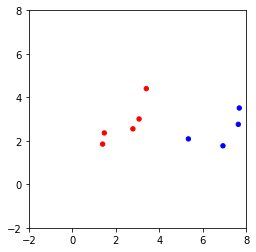

In [33]:
# Test training backprop algorithm
seed(1)
T = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
n_inputs = len(T[0]) - 1
n_outputs = len(set([row[-1] for row in T]))
network = initialize_network(n_inputs, 2, n_outputs)
train_network(network, T, 0.5, 20, n_outputs)
for layer in network:
	print(layer)
figure, axes = plt.subplots()
axes.set_aspect( 1 ) 
plt.xlim( -2 ,8 ) 
plt.ylim( -2 , 8) 
for i in range(len(T)):
    cl = 'blue' if T[i][2] > 0 else 'red'
    cc = plt.Circle( (T[i][0], T[i][1] ), 0.1 ,fill = True, color =cl )   
    axes.add_artist( cc)     


In [25]:
print (neuron['inputs'], row)
for i in range(len(row)):
    neuron['inputs'][i] = row[i]

[0.5, 0.6, 0.7] [0.5, 0.6, 0.7]


In [16]:
import matplotlib.pyplot as plt 
from math import exp
from random import seed
from random import random

def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)],
                     'inputs':[0 for i in range(n_inputs)], 'output':0, 'delta':0} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)],
                     'inputs':[0 for i in range(n_hidden)], 'output':0, 'delta':0} for i in range(n_outputs)]
	network.append(output_layer)
	return network

def activate(neuron):
	activation = neuron['weights'][-1]
	for i in range(len(neuron['weights'])-1):
		activation += neuron['weights'][i] * neuron['inputs'][i]
	return activation

def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

def forward_propagate(network, row):
    for neuron in network[0]:
        for i in range(len(row)):
            neuron['inputs'][i] = row[i]
            
    for l in range(len(network)):
        layer = network[l]
        for neuron in layer:
            activation = activate(neuron)
            neuron['output'] = transfer(activation)
        if l < len(network)-1:
            for neuron in network[l+1]:
                for i in range(len(network[l])):
                    neuron['inputs'][i] = network[l][i]["output"]
            
        outputs = []
        for neuron in network[-1]:
            outputs.append(neuron["output"])
    return outputs

In [18]:
network = initialize_network(3, 3, 2)
row = [.5,.6,.7]
out = forward_propagate(network, row)
print (out)

[0.9292503480872945, 0.8327351731899971]


In [12]:
print (network[0])

[{'weights': [0.10006762741055752, 0.8447042919997182, 0.18170240663825388, 0.8759220004779279], 'inputs': [0, 0, 0], 'output': 0, 'delta': 0}, {'weights': [0.23292078440189878, 0.29671656560687276, 0.7096207079228088, 0.9821899049324214], 'inputs': [0, 0, 0], 'output': 0, 'delta': 0}, {'weights': [0.5093592704483646, 0.5644310181899835, 0.6928349906178054, 0.92527004046846], 'inputs': [0, 0, 0], 'output': 0, 'delta': 0}]


In [7]:
row = [.5,.6,.7]


[{'weights': [0.6738610621451352, 0.6807532457649631, 0.8463959263099339, 0.781291492208344], 'inputs': [0.5, 0.6, 0.7], 'output': 0, 'delta': 0}, {'weights': [0.29545850149798536, 0.30546475112944405, 0.6435046761448059, 0.9644993965347383], 'inputs': [0.5, 0.6, 0.7], 'output': 0, 'delta': 0}, {'weights': [0.46375099648629126, 0.7241938547947231, 0.7323161615572665, 0.3820160397521203], 'inputs': [0.5, 0.6, 0.7], 'output': 0, 'delta': 0}]
